In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_text
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
ap_df = pd.read_csv("BostonHousing.csv")

In [3]:
ap_df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [4]:
ap_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [5]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [6]:
ap_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [7]:
ap_df = ap_df.drop(columns=['MEDV'])
ap_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,1


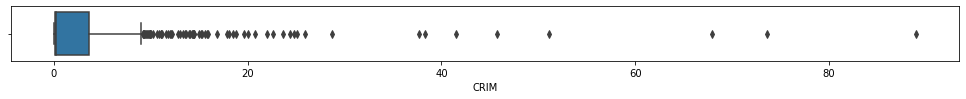

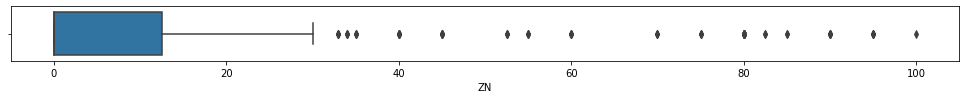

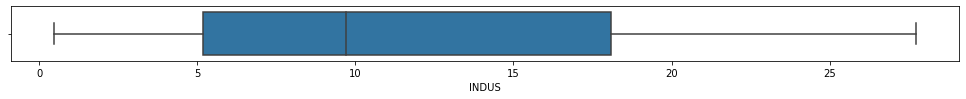

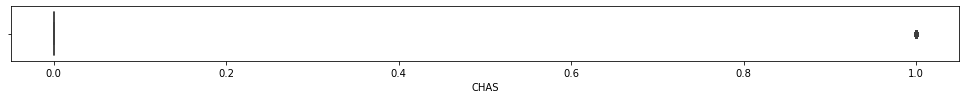

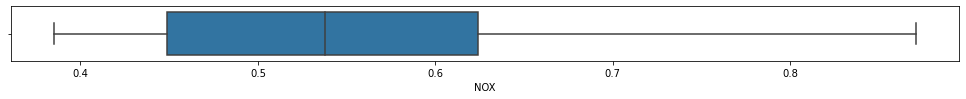

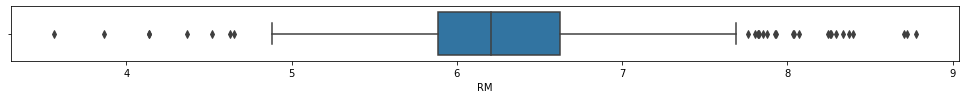

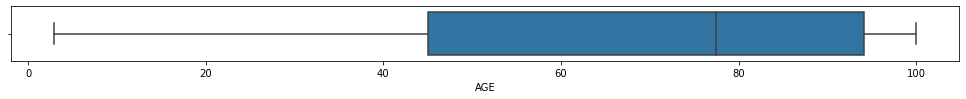

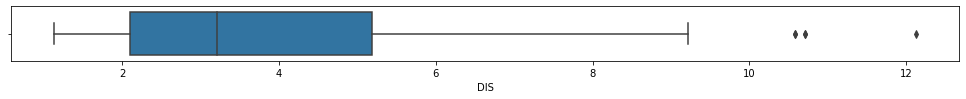

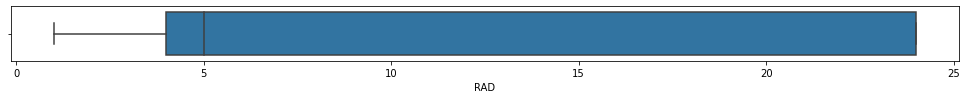

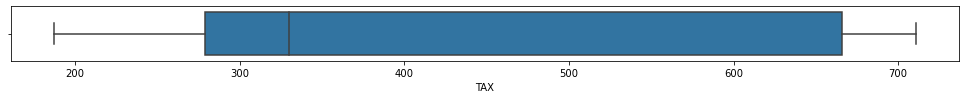

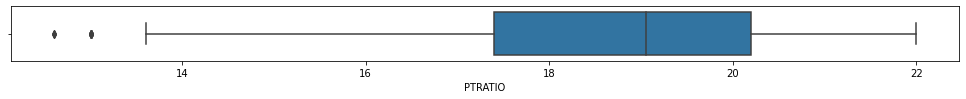

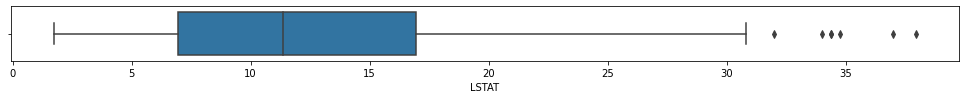

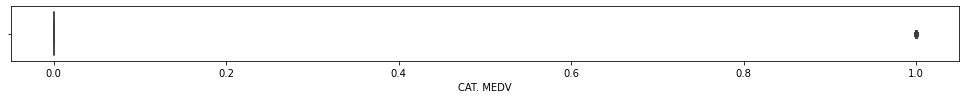

In [8]:
for column in ap_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=ap_df, x=column)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'CAT. MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

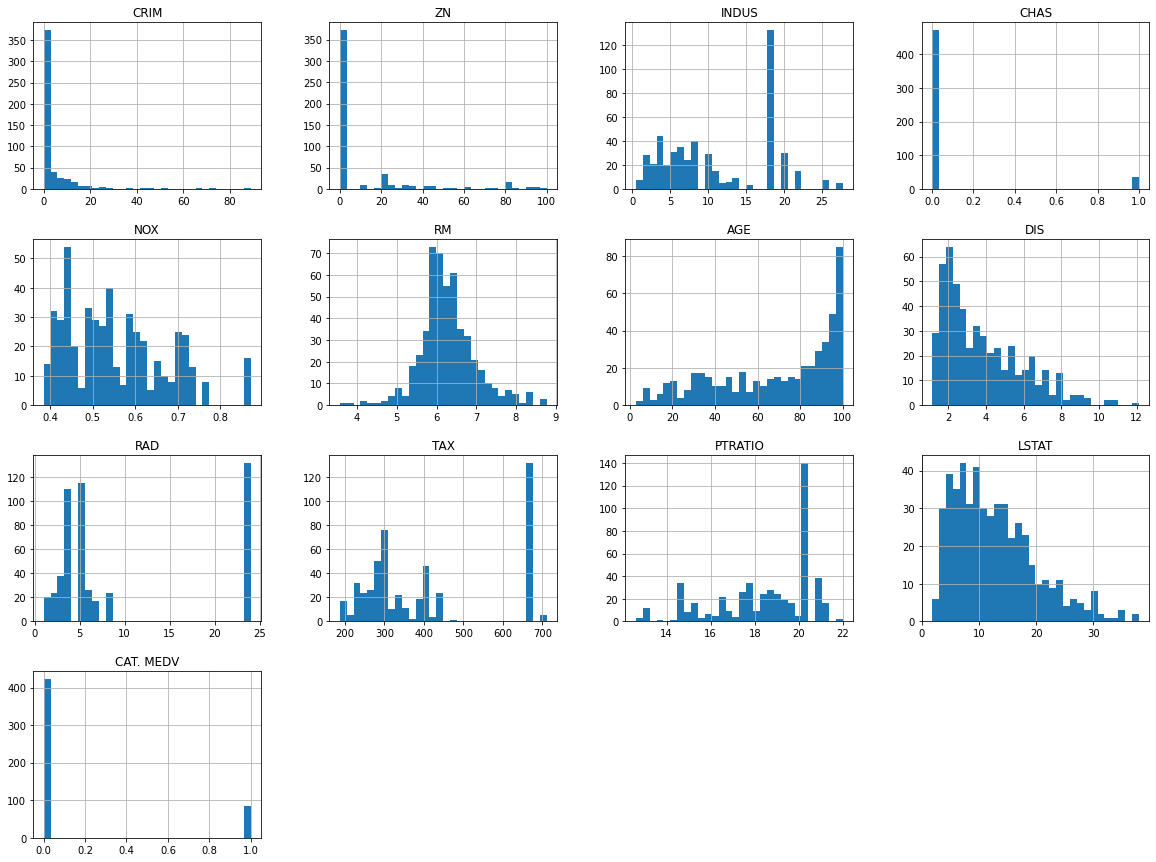

In [9]:
ap_df.hist(bins=30, figsize=(20, 15))

In [10]:
for column in ap_df:
    print(column + " Mean :" + str(ap_df[column].mean()))
    print(column + " Median :" + str(ap_df[column].median()))
    print()

CRIM Mean :3.6135235573122535
CRIM Median :0.25651

ZN Mean :11.363636363636363
ZN Median :0.0

INDUS Mean :11.136778656126504
INDUS Median :9.69

CHAS Mean :0.0691699604743083
CHAS Median :0.0

NOX Mean :0.5546950592885372
NOX Median :0.538

RM Mean :6.284634387351787
RM Median :6.2085

AGE Mean :68.57490118577078
AGE Median :77.5

DIS Mean :3.795042687747034
DIS Median :3.2074499999999997

RAD Mean :9.549407114624506
RAD Median :5.0

TAX Mean :408.2371541501976
TAX Median :330.0

PTRATIO Mean :18.455533596837967
PTRATIO Median :19.05

LSTAT Mean :12.653063241106723
LSTAT Median :11.36

CAT. MEDV Mean :0.16600790513833993
CAT. MEDV Median :0.0



In [11]:
ap_df['CAT. MEDV'].value_counts()

0    422
1     84
Name: CAT. MEDV, dtype: int64

In [12]:
ap_y = ap_df['CAT. MEDV']
ap_X = ap_df.drop(columns=['CAT. MEDV'])

In [13]:
ap_X_train, ap_X_val, ap_y_train, ap_y_val = train_test_split(ap_X,ap_y, test_size=0.3,random_state=0)

## Random Forest

In [14]:
ap_param ={ 
    'n_estimators': [50,80,100,150], 
    'max_features': range(1,12) 
} 
ap_rf = RandomForestClassifier(random_state=0) 
ap_grid_search = GridSearchCV(estimator=ap_rf, param_grid=ap_param,n_jobs=-1) 
ap_grid_search.fit(ap_X_train,ap_y_train) 


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': range(1, 12),
                         'n_estimators': [50, 80, 100, 150]})

In [15]:
ap_grid_search.best_params_ 

{'max_features': 5, 'n_estimators': 50}

In [16]:
ap_grid_search.score(ap_X_val,ap_y_val) 

0.9736842105263158

In [17]:
ap_final_model = ap_grid_search.best_estimator_
ap_feature_imp = pd.Series(ap_final_model.feature_importances_,index=ap_X.columns).sort_values(ascending = False)
ap_feature_imp

RM         0.412881
LSTAT      0.213547
PTRATIO    0.100141
INDUS      0.079441
TAX        0.061776
CRIM       0.029790
DIS        0.025786
AGE        0.023781
ZN         0.022103
RAD        0.017405
NOX        0.011272
CHAS       0.002077
dtype: float64

## SVM

In [18]:
ap_y = ap_df['CAT. MEDV']
ap_X = ap_df.drop(columns=['CAT. MEDV'])
ap_X = StandardScaler().fit_transform(ap_X)

In [19]:
ap_X_train, ap_X_val, ap_y_train, ap_y_val = train_test_split(ap_X,ap_y, test_size=0.3,random_state=0)

### Linear

In [20]:
ap_linearSVM = svm.SVC(kernel='linear')
ap_linearSVM.fit(ap_X_train,ap_y_train)

SVC(kernel='linear')

In [21]:
ap_linearSVM.C

1.0

In [22]:
ap_linearSVM.score(ap_X_val,ap_y_val)

0.9605263157894737

### Radial

In [23]:
ap_radialSVM = svm.SVC(kernel='rbf')
ap_radialSVM.fit(ap_X_train,ap_y_train)

SVC()

In [24]:
ap_radialSVM.C

1.0

In [25]:
ap_radialSVM.score(ap_X_val,ap_y_val)

0.9605263157894737

In [26]:
ap_param = {'C': [0.1,0.5, 1, 5, 10],
            'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear']}

ap_SVM=svm.SVC()
ap_grid = GridSearchCV(estimator=ap_SVM,param_grid=ap_param,verbose=3,cv=10)
         
ap_grid.fit(ap_X_train, ap_y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 2/10] END ....C=0.1, gamma=1, kernel=linea

[CV 2/10] END .C=0.5, gamma=0.01, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/10] END .C=0.5, gamma=0.01, kernel=linear;, score=0.944 total time=   0.0s
[CV 4/10] END .C=0.5, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10] END .C=0.5, gamma=0.01, kernel=linear;, score=0.943 total time=   0.0s
[CV 6/10] END .C=0.5, gamma=0.01, kernel=linear;, score=0.886 total time=   0.0s
[CV 7/10] END .C=0.5, gamma=0.01, kernel=linear;, score=0.914 total time=   0.0s
[CV 8/10] END .C=0.5, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10] END .C=0.5, gamma=0.01, kernel=linear;, score=0.914 total time=   0.0s
[CV 10/10] END C=0.5, gamma=0.01, kernel=linear;, score=0.943 total time=   0.0s
[CV 1/10] END ...C=0.5, gamma=0.001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/10] END ...C=0.5, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/10] END ...C=0.5, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/10] END ...C=0.5, gamm

[CV 5/10] END .......C=5, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 6/10] END .......C=5, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 7/10] END .......C=5, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 8/10] END .......C=5, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END .......C=5, gamma=0.1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 10/10] END ......C=5, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 1/10] END ....C=5, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 2/10] END ....C=5, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/10] END ....C=5, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 4/10] END ....C=5, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 5/10] END ....C=5, gamma=0.1, kernel=linear;, score=0.943 total time=   0.0s
[CV 6/10] END ....C=5, gamma=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 7/10] END ....C=5, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [27]:
ap_grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
ap_grid.score(ap_X_val,ap_y_val)

0.9605263157894737